# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
print(X.head())
print(y[0:5])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
[24.  21.6 34.7 33.4 36.2]


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
#print(X_train_scaled.head())
#print(X_test_scaled.head())

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(X_train_scaled.shape)
print(X_train_tsne.shape)

(404, 13)
(404, 2)


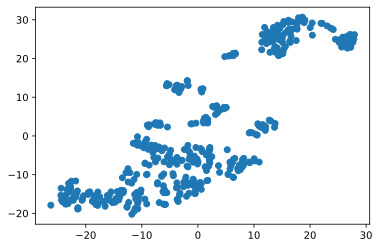

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
labels_train = kmeans.fit_predict(X_train_scaled)
#labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

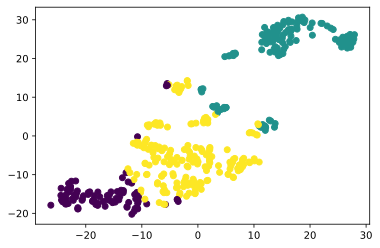

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [35]:
X_train.loc[labels_train == 0,'CRIM'].mean()

0.07356558139534886

In [37]:
y_train[labels_train == 0].mean()

27.78837209302326

In [76]:
for i in range(3):
    print ('\nCluster ', i)
    print ('mean price = ', y_train[labels_train == i].mean())
    print ('mean CRIM  = ' ,X_train.loc[labels_train == i,'CRIM'].mean())


Cluster  0
mean price =  27.78837209302326
mean CRIM  =  0.07356558139534886

Cluster  1
mean price =  16.165354330708663
mean CRIM  =  10.797028425196853

Cluster  2
mean price =  24.958115183246072
mean CRIM  =  0.42166020942408367


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [45]:
labels_test = kmeans.predict(X_test_scaled)
#labels_test

In [77]:
for i in range(3):
    print ('\nCluster ', i)
    print ('mean price = ', y_test[labels_test == i].mean())
    print ('mean CRIM  = ' ,X_test.loc[labels_test == i,'CRIM'].mean())


Cluster  0
mean price =  31.35
mean CRIM  =  0.062060000000000004

Cluster  1
mean price =  16.43714285714286
mean CRIM  =  10.165531142857143

Cluster  2
mean price =  21.860784313725492
mean CRIM  =  0.26607882352941176


In [78]:
# Можно представить результат в виде DataFrame, где индекс будет показывать кластер:
df_mean_test = pd.DataFrame(columns = ['mean_price', 'mean_CRIM'])
for i in range(3):
    df_mean_test.loc[i] = [y_test[labels_test == i].mean(), X_test.loc[labels_test == i,'CRIM'].mean()]
df_mean_test

,mean_price,mean_CRIM
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079
